# Projet - Analyse de données - Subvention des Associations

### Amaury Richard & Victoire Flesselles

## Documentation

Nous allons étudier la répartition des subventions accordées aux différentes associations parisiennes. La documentation de la source de données est disponible [ici](https://opendata.paris.fr/explore/dataset/subventions-accordees-et-refusees/information/?disjunctive.collectivite&disjunctive.nom_beneficiaire&disjunctive.direction&disjunctive.secteurs_d_activites_definies_par_l_association&fbclid=IwAR3XJekkoUasIjGTl346zJSyoJCs4rmpXmQAwNcqLOcPfIdz8MaIro_dUUs&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJwaWUiLCJmdW5jIjoiU1VNIiwieUF4aXMiOiJtb250YW50X3ZvdGUiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1QYWlyZWQiLCJwb3NpdGlvbiI6ImNlbnRlciJ9XSwieEF4aXMiOiJuYXR1cmVfZGVfbGFfc3VidmVudGlvbiIsIm1heHBvaW50cyI6MTAwLCJzb3J0Ijoic2VyaWUxLTEiLCJzZXJpZXNCcmVha2Rvd24iOiIiLCJzZXJpZXNCcmVha2Rvd25UaW1lc2NhbGUiOiIiLCJ0aW1lc2NhbGUiOiIiLCJjb25maWciOnsiZGF0YXNldCI6InN1YnZlbnRpb25zLWFjY29yZGVlcy1ldC1yZWZ1c2VlcyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuY29sbGVjdGl2aXRlIjp0cnVlLCJkaXNqdW5jdGl2ZS5ub21fYmVuZWZpY2lhaXJlIjp0cnVlLCJkaXNqdW5jdGl2ZS5kaXJlY3Rpb24iOnRydWUsImRpc2p1bmN0aXZlLnNlY3RldXJzX2RfYWN0aXZpdGVzX2RlZmluaWVzX3Bhcl9sX2Fzc29jaWF0aW9uIjp0cnVlLCJmYmNsaWQiOiJJd0FSM1hKZWtrb1Vhc0lqR1RsMzQ2ekpTeW9KQ3M0cm1wWG1RQXdOY3FMT2NQZklkejhNYUlyb19kVVVzIn19fV0sInRpbWVzY2FsZSI6IiIsImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9).

## Import des données

In [1]:
import pandas

In [2]:
import matplotlib as plt

In [3]:
assos = pandas.read_csv("subventions-accordees-et-refusees.csv",sep=";")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Vérifions que le fichier ait bien chargé

In [4]:
assos.head()

,Numéro de dossier,Année budgétaire,Collectivité,Nom Bénéficiaire,Numéro Siret,Objet du dossier,Montant voté,Direction,Nature de la subvention,Secteurs d'activités définies par l'association
0,2020_07586,2020,Ville de Paris,13 POUR TOUS,48905531900029,Co-financement DDCT d'un poste adultes-relais ...,4700,DDCT,Fonctionnement,Loisirs;Social;Vie et animation locale
1,2020_08053,2020,Ville de Paris,13 POUR TOUS,48905531900029,CS 2020/DASES SEPLEX,209692,DASES,Fonctionnement,Loisirs;Social;Vie et animation locale
2,2020_04885,2020,Ville de Paris,3 S : SEJOUR SPORTIF SOLIDAIRE,81147565600013,Ressourcerie Ephémère,0,DAE,Non précisée,Environnement & écologie;Sport;Vie et animatio...
3,2020_05032,2020,Ville de Paris,4 A 4 DIX HUIT,48909505900015,De Mômes et d'opérette : Des grottes de Lascau...,0,DASCO,Non précisée,Culture & Arts;Social;Sport
4,2020_02992,2020,Ville de Paris,ABC PUERICULTURE,34482479200032,Fonctionnement 2020 cité des ours 14 cité fala...,217134,DFPE,Fonctionnement,Education & formation;Santé;Social


## Préparer les données pour les exploiter correctement

La documentation nous informe que la colonne "Secteurs d'activités définies par l'association" comporte au maximum trois attributs. Nous allons spliter les attributs de cette colonne afin de les exploiter par la suite.

In [5]:
assos["Secteurs d'activités définies par l'association"].str.split(";",expand=True)[0]

assos.insert(10,"Secteur Activité 1",assos["Secteurs d'activités définies par l'association"].str.split(";",expand=True)[0])
assos.insert(11,"Secteur Activité 2",assos["Secteurs d'activités définies par l'association"].str.split(";",expand=True)[1])
assos.insert(12,"Secteur Activité 3",assos["Secteurs d'activités définies par l'association"].str.split(";",expand=True)[2])
del assos["Secteurs d'activités définies par l'association"]

In [6]:
assos.head()

,Numéro de dossier,Année budgétaire,Collectivité,Nom Bénéficiaire,Numéro Siret,Objet du dossier,Montant voté,Direction,Nature de la subvention,Secteur Activité 1,Secteur Activité 2,Secteur Activité 3
0,2020_07586,2020,Ville de Paris,13 POUR TOUS,48905531900029,Co-financement DDCT d'un poste adultes-relais ...,4700,DDCT,Fonctionnement,Loisirs,Social,Vie et animation locale
1,2020_08053,2020,Ville de Paris,13 POUR TOUS,48905531900029,CS 2020/DASES SEPLEX,209692,DASES,Fonctionnement,Loisirs,Social,Vie et animation locale
2,2020_04885,2020,Ville de Paris,3 S : SEJOUR SPORTIF SOLIDAIRE,81147565600013,Ressourcerie Ephémère,0,DAE,Non précisée,Environnement & écologie,Sport,Vie et animation locale
3,2020_05032,2020,Ville de Paris,4 A 4 DIX HUIT,48909505900015,De Mômes et d'opérette : Des grottes de Lascau...,0,DASCO,Non précisée,Culture & Arts,Social,Sport
4,2020_02992,2020,Ville de Paris,ABC PUERICULTURE,34482479200032,Fonctionnement 2020 cité des ours 14 cité fala...,217134,DFPE,Fonctionnement,Education & formation,Santé,Social


Nous allons enregistrer ce fichier "splité".

In [7]:
assos.to_csv('./subventions-accordees-et-refusees-split.csv',sep=';',index=False)

## Nettoyer et alléger les données

Regardons les informations techniques du tableau.

In [8]:
assos.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73034 entries, 0 to 73033
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Numéro de dossier        73034 non-null  object
 1   Année budgétaire         73034 non-null  int64 
 2   Collectivité             73034 non-null  object
 3   Nom Bénéficiaire         73013 non-null  object
 4   Numéro Siret             72843 non-null  object
 5   Objet du dossier         73034 non-null  object
 6   Montant voté             73034 non-null  int64 
 7   Direction                73034 non-null  object
 8   Nature de la subvention  73034 non-null  object
 9   Secteur Activité 1       72994 non-null  object
 10  Secteur Activité 2       61353 non-null  object
 11  Secteur Activité 3       51102 non-null  object
dtypes: int64(2), object(10)
memory usage: 6.7+ MB


On remarque que la mémoire utilise 6,7 MB de stockage.

Nous allons étudier la tendance sur les 5000 premières lignes pour alléger les données et l'espace mémoire.

In [9]:
assos_study = pandas.read_csv("subventions-accordees-et-refusees-split.csv",sep=";",nrows=25000)

In [10]:
assos_study.head()

,Numéro de dossier,Année budgétaire,Collectivité,Nom Bénéficiaire,Numéro Siret,Objet du dossier,Montant voté,Direction,Nature de la subvention,Secteur Activité 1,Secteur Activité 2,Secteur Activité 3
0,2020_07586,2020,Ville de Paris,13 POUR TOUS,48905531900029,Co-financement DDCT d'un poste adultes-relais ...,4700,DDCT,Fonctionnement,Loisirs,Social,Vie et animation locale
1,2020_08053,2020,Ville de Paris,13 POUR TOUS,48905531900029,CS 2020/DASES SEPLEX,209692,DASES,Fonctionnement,Loisirs,Social,Vie et animation locale
2,2020_04885,2020,Ville de Paris,3 S : SEJOUR SPORTIF SOLIDAIRE,81147565600013,Ressourcerie Ephémère,0,DAE,Non précisée,Environnement & écologie,Sport,Vie et animation locale
3,2020_05032,2020,Ville de Paris,4 A 4 DIX HUIT,48909505900015,De Mômes et d'opérette : Des grottes de Lascau...,0,DASCO,Non précisée,Culture & Arts,Social,Sport
4,2020_02992,2020,Ville de Paris,ABC PUERICULTURE,34482479200032,Fonctionnement 2020 cité des ours 14 cité fala...,217134,DFPE,Fonctionnement,Education & formation,Santé,Social


Affichons le type de données et le nombre de valeurs non nulles dans chaque colonne.

In [11]:
assos_study.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Numéro de dossier        25000 non-null  object
 1   Année budgétaire         25000 non-null  int64 
 2   Collectivité             25000 non-null  object
 3   Nom Bénéficiaire         24992 non-null  object
 4   Numéro Siret             24957 non-null  object
 5   Objet du dossier         25000 non-null  object
 6   Montant voté             25000 non-null  int64 
 7   Direction                25000 non-null  object
 8   Nature de la subvention  25000 non-null  object
 9   Secteur Activité 1       24990 non-null  object
 10  Secteur Activité 2       21031 non-null  object
 11  Secteur Activité 3       17529 non-null  object
dtypes: int64(2), object(10)
memory usage: 2.3+ MB


<AxesSubplot:ylabel='Frequency'>

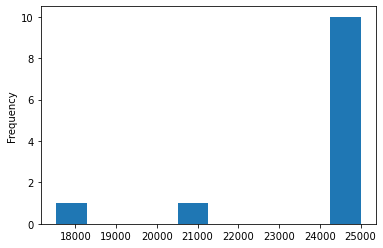

In [12]:
column_count = assos_study.count()
column_count.plot.hist()

Au vu des résultats ci-dessus, nous avons décidé de garder toutes les colonnes qui sont pour la plupart totalement remplies.

## Gagner de l'espace mémoire en modifiant le type de données

In [13]:
assos_study.nunique()

Numéro de dossier          24995
Année budgétaire               8
Collectivité                   2
Nom Bénéficiaire            6326
Numéro Siret                6015
Objet du dossier           18616
Montant voté                2170
Direction                     25
Nature de la subvention        4
Secteur Activité 1            22
Secteur Activité 2            21
Secteur Activité 3            18
dtype: int64

Regardons quelles valeurs sont récurrentes dans les colonnes avec peu de valeurs uniques.

In [14]:
assos_study['Année budgétaire'].unique()

array([2020, 2019, 2017, 2018, 2016, 2013, 2014, 2015], dtype=int64)

In [15]:
assos_study['Collectivité'].unique()

array(['Ville de Paris', 'Département de Paris'], dtype=object)

In [16]:
assos_study['Direction'].unique()

array(['DDCT', 'DASES', 'DAE', 'DASCO', 'DFPE', 'DAC', 'DEVE', 'DPSP',
       'DJS', 'DPE', 'DGRI', 'DVD', 'SG', 'DGOM', 'CASVP', 'DU', 'DRH',
       'DLH', 'DPVI', 'DUCT', 'SG-MI-CINEMA', 'SG-DPMC', 'DFA', 'DICOM',
       'SGCP'], dtype=object)

In [17]:
assos_study['Nature de la subvention'].unique()

array(['Fonctionnement', 'Non précisée', 'Projet', 'Investissement'],
      dtype=object)

In [18]:
assos_study['Secteur Activité 1'].unique()

array(['Loisirs', 'Environnement & écologie', 'Culture & Arts',
       'Education & formation', 'Vie et animation locale', 'Emploi',
       'Aides aux associations', 'Santé', 'Communication & média',
       'Social', 'Humanitaire', 'Sport',
       'Défense des droits et des intérêts', 'Economie', 'Mémoire',
       'Précarité & Exclusion', 'Architecture & urbanisme',
       'Idée & opinion', 'Relations internationales',
       'Déplacements et transports', 'Tourisme', nan,
       'Technique & Recherche'], dtype=object)

In [19]:
assos_study['Secteur Activité 2'].unique()

array(['Social', 'Sport', 'Santé', nan, 'Mémoire',
       'Précarité & Exclusion', 'Emploi', 'Environnement & écologie',
       'Education & formation', 'Défense des droits et des intérêts',
       'Vie et animation locale', 'Culture & Arts', 'Loisirs',
       'Humanitaire', 'Relations internationales', 'Economie',
       'Idée & opinion', 'Technique & Recherche', 'Tourisme',
       'Déplacements et transports', 'Communication & média',
       'Architecture & urbanisme'], dtype=object)

In [20]:
assos_study['Secteur Activité 3'].unique()

array(['Vie et animation locale', 'Sport', 'Social', nan,
       'Précarité & Exclusion', 'Technique & Recherche',
       'Environnement & écologie', 'Loisirs', 'Santé', 'Mémoire',
       'Idée & opinion', 'Education & formation', 'Emploi', 'Tourisme',
       'Relations internationales', 'Humanitaire', 'Economie',
       'Culture & Arts', 'Défense des droits et des intérêts'],
      dtype=object)

In [21]:
assos_study.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Numéro de dossier        25000 non-null  object
 1   Année budgétaire         25000 non-null  int64 
 2   Collectivité             25000 non-null  object
 3   Nom Bénéficiaire         24992 non-null  object
 4   Numéro Siret             24957 non-null  object
 5   Objet du dossier         25000 non-null  object
 6   Montant voté             25000 non-null  int64 
 7   Direction                25000 non-null  object
 8   Nature de la subvention  25000 non-null  object
 9   Secteur Activité 1       24990 non-null  object
 10  Secteur Activité 2       21031 non-null  object
 11  Secteur Activité 3       17529 non-null  object
dtypes: int64(2), object(10)
memory usage: 2.3+ MB


In [22]:
from pandas.api.types import CategoricalDtype
dtype ={
    'Année budgétaire':CategoricalDtype(categories=[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], ordered=True),
    'Collectivité':'category',
    'Direction':'category',
    'Nature de la subvention':'category',
    'Secteur Activité 1':'category',
    'Secteur Activité 2':'category',
    'Secteur Activité 3':'category'
}

In [23]:
assos_study = pandas.read_csv("subventions-accordees-et-refusees-split.csv",sep=";",nrows=25000,dtype=dtype)

In [24]:
assos_study.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Numéro de dossier        25000 non-null  object  
 1   Année budgétaire         25000 non-null  category
 2   Collectivité             25000 non-null  category
 3   Nom Bénéficiaire         24992 non-null  object  
 4   Numéro Siret             24957 non-null  object  
 5   Objet du dossier         25000 non-null  object  
 6   Montant voté             25000 non-null  int64   
 7   Direction                25000 non-null  category
 8   Nature de la subvention  25000 non-null  category
 9   Secteur Activité 1       24990 non-null  category
 10  Secteur Activité 2       21031 non-null  category
 11  Secteur Activité 3       17529 non-null  category
dtypes: category(7), int64(1), object(4)
memory usage: 1.1+ MB


In [25]:
assos = pandas.read_csv("subventions-accordees-et-refusees-split.csv",sep=";",dtype=dtype)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
assos.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73034 entries, 0 to 73033
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Numéro de dossier        73034 non-null  object  
 1   Année budgétaire         69690 non-null  category
 2   Collectivité             73034 non-null  category
 3   Nom Bénéficiaire         73013 non-null  object  
 4   Numéro Siret             72843 non-null  object  
 5   Objet du dossier         73034 non-null  object  
 6   Montant voté             73034 non-null  int64   
 7   Direction                73034 non-null  category
 8   Nature de la subvention  73034 non-null  category
 9   Secteur Activité 1       72994 non-null  category
 10  Secteur Activité 2       61353 non-null  category
 11  Secteur Activité 3       51102 non-null  category
dtypes: category(7), int64(1), object(4)
memory usage: 3.3+ MB


La mémoire n'occupe plus que 3,3 MB contre 6,7 MB tout à l'heure.

## Analyse descriptive des données

Montant total des subventions votées par exercice budgétaire 

In [29]:
amount_year = assos.groupby(['Année budgétaire'])[('Montant voté')].sum()
amount_year

Année budgétaire
2013    240502938
2014    258237727
2015    270822332
2016    275349227
2017    276239759
2018    271370958
2019    291287234
2020    295523457
Name: Montant voté, dtype: int64

 Les 20 premières associations bénéficiaires par montants votés 

## Analyse en composante principale